In [1]:
import pandas as pd

# Load the dataset with Latin-1 encoding
df = pd.read_csv(r'C:\Users\Musi\final_dataset.csv', encoding='latin1')


In [2]:
# Step 1: Explore data (optional)
print(df.head())
print("Dataset size:", df.shape)
print(df.info())
print(df.isnull().sum())

          id                            title  year duration MPA  rating  \
0  tt0073195                             Jaws  1975    2h 4m  PG     8.1   
1  tt0073629    The Rocky Horror Picture Show  1975   1h 40m   R     7.4   
2  tt0073486  One Flew Over the Cuckoo's Nest  1975   2h 13m   R     8.7   
3  tt0072890                Dog Day Afternoon  1975    2h 5m   R     8.0   
4  tt0073692                          Shampoo  1975   1h 50m   R     6.4   

  votes  meta_score                                        description  \
0  690K        87.0  When a massive killer shark unleashes chaos on...   
1  174K        65.0  A newly-engaged couple have a breakdown in an ...   
2  1.1M        84.0  In the Fall of 1963, a Korean War veteran and ...   
3  281K        86.0  Three amateur robbers plan to hold up a Brookl...   
4   15K        65.0  On Election Day, 1968, irresponsible hairdress...   

                             Movie_Link  ... opening_weekend_gross  \
0  https://www.imdb.com/titl

In [43]:
# Step 2: Data clean garne

# 'description' column bata extra spaces hataune (column ko exact naam herera)
df['description'] = df['description'].str.strip()

# 'release_date' lai datetime ma convert garne, error aaye pani ignore garne
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Clean gare paxi data ko type kasto xa herne
print(df.dtypes)


id                               object
title                            object
year                              int64
duration                         object
MPA                              object
rating                          float64
votes                            object
meta_score                      float64
description                      object
Movie_Link                       object
writers                          object
directors                        object
stars                            object
budget                           object
opening_weekend_gross            object
gross_worldwide                  object
gross_us_canada                  object
release_date             datetime64[ns]
countries_origin                 object
filming_locations                object
production_companies             object
awards_content                   object
genres                           object
languages                        object
dtype: object


In [3]:
# Step 3: Feature engineering garne ho

# Comma hataune ani gross columns lai numeric ma convert garne, jaha error cha tyo not a number(NaN) ma rakhne
df['gross_us_canada'] = pd.to_numeric(df['gross_us_canada'].str.replace(',', '', regex=False), errors='coerce')
df['gross_worldwide'] = pd.to_numeric(df['gross_worldwide'].str.replace(',', '', regex=False), errors='coerce')

# NaN lai 0 le fill garera safe addition garna milos
df['gross_us_canada'] = df['gross_us_canada'].fillna(0)
df['gross_worldwide'] = df['gross_worldwide'].fillna(0)

# TotalGross bhanne column banau, jun US Canada ra Worldwide gross ko sum ho
df['TotalGross'] = df['gross_us_canada'] + df['gross_worldwide']

# release_date lai datetime ma convert garna, jodi ahile samma bhayeko chaina bhane
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# release_date bata year, month, day extract garne
df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month
df['Day'] = df['release_date'].dt.day

# Nai banaeko columns check garera herne
print(df[['TotalGross', 'Year', 'Month', 'Day']].head())


   TotalGross    Year  Month  Day
0         0.0  1970.0    1.0  1.0
1         0.0  1970.0    1.0  1.0
2         0.0  1970.0    1.0  1.0
3         0.0  1970.0    1.0  1.0
4         0.0  1970.0    1.0  1.0


               year        rating    meta_score  gross_worldwide  \
count  63249.000000  59181.000000  15533.000000          63249.0   
mean    1972.686572      6.162731     59.071203              0.0   
min     1920.000000      1.000000      1.000000              0.0   
25%     1946.000000      5.500000     47.000000              0.0   
50%     1973.000000      6.300000     61.000000              0.0   
75%     1999.000000      6.900000     72.000000              0.0   
max     2025.000000     10.000000    100.000000              0.0   
std       30.544579      1.070630     17.403032              0.0   

       gross_us_canada                   release_date  TotalGross     Year  \
count          63249.0                          54849     63249.0  54849.0   
mean               0.0  1970-01-01 00:00:00.000001966         0.0   1970.0   
min                0.0  1970-01-01 00:00:00.000001920         0.0   1970.0   
25%                0.0  1970-01-01 00:00:00.000001943         0.0   1970.0 

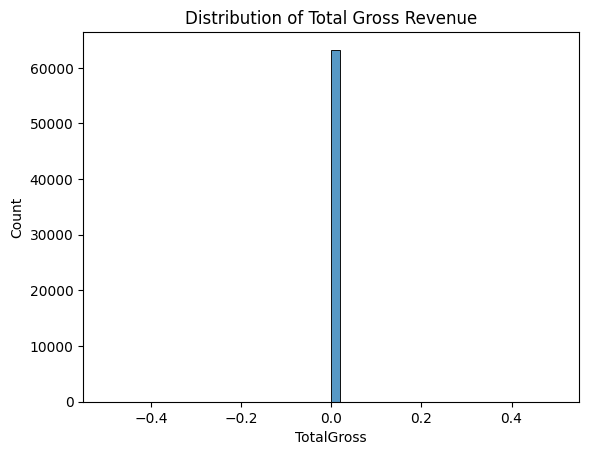

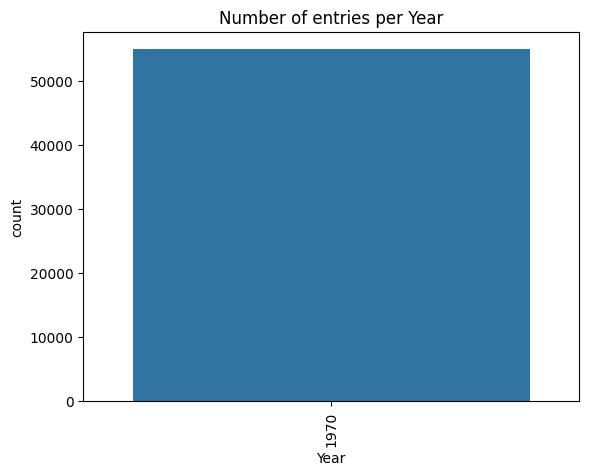

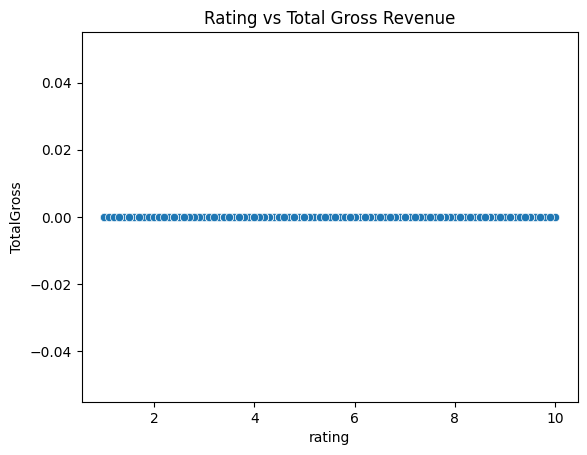

id                           0
title                        0
year                         0
duration                  2075
MPA                      22022
rating                    4068
votes                     4068
meta_score               47716
description               2360
Movie_Link                   0
writers                    269
directors                   51
stars                      344
budget                   47890
opening_weekend_gross    46412
gross_worldwide              0
gross_us_canada              0
release_date              8400
countries_origin            99
filming_locations        16854
production_companies      1973
awards_content           36181
genres                     787
languages                  330
TotalGross                   0
Year                         0
Month                     8400
Day                       8400
dtype: int64


In [4]:
# Step 4: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of numeric columns
print(df.describe())

# Plot distribution of TotalGross revenue
sns.histplot(df['TotalGross'], bins=50)
plt.title('Distribution of Total Gross Revenue')
plt.show()

# Count number of entries per year (ignore invalid years)
df['Year'] = df['Year'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int
sns.countplot(x='Year', data=df[df['Year'] > 0])  # Plot only valid years
plt.xticks(rotation=90)
plt.title('Number of entries per Year')
plt.show()

# Scatter plot of rating vs TotalGross to check relationship
sns.scatterplot(x='rating', y='TotalGross', data=df)
plt.title('Rating vs Total Gross Revenue')
plt.show()

# Check missing values in each column
print(df.isna().sum())


In [5]:
# Step 5 : Data Cleaning and Total Gross Calculation


import pandas as pd

# Data load gareko (example file name ho, tapaile afno file name halnu parcha)
df = pd.read_csv('final_dataset.csv')

# 1. 'gross_us_canada' column ma 0 haru lai pandas ko missing value (pd.NA) le replace garnu
#    Note: inplace=True use nagari, directly column ma assign gareko
df['gross_us_canada'] = df['gross_us_canada'].replace(0, pd.NA)

# 2. 'gross_worldwide' column ma pani 0 lai pd.NA le replace garnu
df['gross_worldwide'] = df['gross_worldwide'].replace(0, pd.NA)

# 3. Aba 'gross_us_canada' column lai numeric ma convert garnu,
#    kunai string ya invalid value bhaye NaN (missing) ma convert huncha
df['gross_us_canada'] = pd.to_numeric(df['gross_us_canada'], errors='coerce')

# 4. 'gross_worldwide' pani numeric ma convert garnu with same error handling
df['gross_worldwide'] = pd.to_numeric(df['gross_worldwide'], errors='coerce')

# 5. Missing values lai fillna(0) le 0 banayera 'TotalGross' calculate garnu
#    Yo bhanda agadi missing (NaN) bhaye math calculation error huncha, tesaile fill garnu parcha
df['TotalGross'] = df['gross_us_canada'].fillna(0) + df['gross_worldwide'].fillna(0)

# 6. Kun kun column ma kati missing values cha bhanera herne
print(df.isnull().sum())

# 7. Data ko first 5 row herne (optional, verify garnalai)
print(df.head())


id                           0
title                        0
year                         0
duration                  2075
MPA                      22022
rating                    4068
votes                     4068
meta_score               47716
description               2360
Movie_Link                   0
writers                    269
directors                   51
stars                      344
budget                   47890
opening_weekend_gross    46412
gross_worldwide          63249
gross_us_canada          63249
release_date              8400
countries_origin            99
filming_locations        16854
production_companies      1973
awards_content           36181
genres                     787
languages                  330
TotalGross                   0
dtype: int64
          id                            title  year duration MPA  rating  \
0  tt0073195                             Jaws  1975    2h 4m  PG     8.1   
1  tt0073629    The Rocky Horror Picture Show  1975   1h 40m

In [6]:
# Step 6: Convert 'genres' string representation of list to actual list
import ast

# Convert the string to list using ast.literal_eval safely
df['genres_list'] = df['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Import MultiLabelBinarizer to one-hot encode the genre lists
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Fit-transform the genres_list column to get one-hot encoded genre columns
genres_dummies = pd.DataFrame(mlb.fit_transform(df['genres_list']),
                             columns=mlb.classes_,
                             index=df.index)
# Concatenate the new one-hot encoded columns back to the original dataframe
df = pd.concat([df, genres_dummies], axis=1)


Index(['id', 'title', 'year', 'duration', 'rating', 'votes', 'meta_score',
       'description', 'Movie_Link', 'writers', 'directors', 'stars', 'budget',
       'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada',
       'release_date', 'countries_origin', 'filming_locations',
       'production_companies', 'awards_content', 'genres', 'languages',
       'TotalGross', 'MPA_Not Rated'],
      dtype='object')


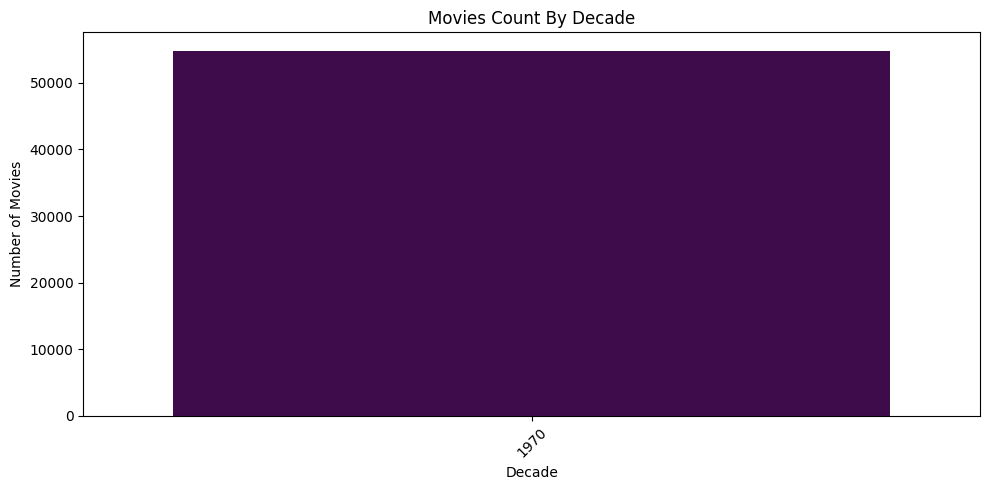

In [8]:
# Step 7: Data Visualization garne ra basic analysis herne


# Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract release year
df['release_year'] = df['release_date'].dt.year

# Drop rows with missing years
df = df.dropna(subset=['release_year'])

# Convert to integer
df['release_year'] = df['release_year'].astype(int)

# Create Decade column
df['Decade'] = (df['release_year'] // 10) * 10

# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(x='Decade', data=df, hue='Decade', palette='viridis', legend=False)
plt.title('Movies Count By Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Step 8: Count number of genres per row
df['genre_count'] = df[genre_columns].sum(axis=1)
print(df[['genre_count']].head())


   genre_count
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0


ValueError: Could not interpret value `genre_count` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>